In [6]:
#Setup

import os
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pylab as plt

logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(1)

np.set_printoptions(suppress=True)

In [7]:
#Data
corner_points = np.empty((0,8), int)
answers = np.empty((0,3), int)

#0,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/n/x0_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,0,0]])

#30,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/x/x30_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points =  np.append(corner_points, data, axis=0) 
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [30,0,0]])

#45,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/x/x45_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points =  np.append(corner_points, data, axis=0) 
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [45,0,0]])   
   
#50,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/x/x50_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points =  np.append(corner_points, data, axis=0) 
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [50,0,0]])   
   
#60,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/x/x60_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points =  np.append(corner_points, data, axis=0) 
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [60,0,0]])
    
    
#0,30,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/y/x0_y30_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,30,0]])
    
#0,45,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/y/x0_y45_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,45,0]])
    
#0,60,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/y/x0_y60_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,60,0]])

#0,-30,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/y/x0_y_neg_30_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,-30,0]])


#0,-60,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/training/y/x0_y_neg_60_z0.txt", dtype=int,encoding=None, delimiter=",")
corner_points = np.append(corner_points, data, axis=0)
rows, colms = data.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,-60,0]])


    
print(corner_points.shape)
print(answers.shape)

(2632, 8)
(2632, 3)


Epoch 1/500


2022-06-14 16:07:01.323647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 16:07:01.329573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 16:07:01.329755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 16:07:01.330171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

83/83 [==============================] - 1s 3ms/step - loss: 355.8898
Epoch 2/500
83/83 [==============================] - 0s 3ms/step - loss: 200.3261
Epoch 3/500
83/83 [==============================] - 0s 3ms/step - loss: 147.9348
Epoch 4/500
83/83 [==============================] - 0s 3ms/step - loss: 126.8762
Epoch 5/500
83/83 [==============================] - 0s 3ms/step - loss: 115.6970
Epoch 6/500
83/83 [==============================] - 0s 2ms/step - loss: 106.3938
Epoch 7/500
83/83 [==============================] - 0s 2ms/step - loss: 102.6968
Epoch 8/500
83/83 [==============================] - 0s 2ms/step - loss: 94.9206
Epoch 9/500
83/83 [==============================] - 0s 2ms/step - loss: 90.1860
Epoch 10/500
83/83 [==============================] - 0s 2ms/step - loss: 90.5238
Epoch 11/500
83/83 [==============================] - 0s 2ms/step - loss: 86.8670
Epoch 12/500
83/83 [==============================] - 0s 2ms/step - loss: 83.1371
Epoch 13/500
83/83 [==========

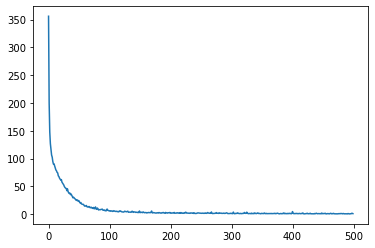

In [8]:
# Model Setup & Training

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Normalization(axis=None),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3,)
                             ])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0002))

history = model.fit(corner_points, answers, epochs=500, verbose=1)

print("Finished training the model")
# plt.xlabel('Epoch Number')
# plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
print(history.history['loss'][-1])
# print(model.predict([0, 0, 1,1,2,2,3,3]))

In [15]:
#Test Data

test_cp = np.empty((0,8), int)
test_ans = np.empty((0,3), int)

#0,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/n/test_x0_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,0,0]])
    
#30,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/x/test_x30_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [30,0,0]])
    
#45,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/x/test_x45_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [45,0,0]])
    
#50,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/x/test_x50_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [50,0,0]])

#60,0,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/x/test_x60_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [60,0,0]])
    
    
#0,30,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/y/test_x0_y30_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,30,0]])
    
#0,45,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/y/test_x0_y45_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,45,0]])
    
# #0,60,0
# data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/x/test_x60_y0_z0.txt", dtype=int,encoding=None, delimiter=",")
# test_cp =  np.append(test_cp, data, axis=0) # append data
# rows, colms = data.shape # append answers
# for x in range(0,rows):
#     test_ans = np.vstack([test_ans, [0,60,0]])
    
#0,-30,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/y/test_x0_y_neg_30_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,-30,0]])
    
#0,-60,0
data = np.genfromtxt("/home/werner/Projects/tensor_flow/raw_data/testing/y/test_x0_y_neg_60_z0.txt", dtype=int,encoding=None, delimiter=",")
test_cp =  np.append(test_cp, data, axis=0) # append data
rows, colms = data.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,-60,0]])
    
print(test_cp.shape)
print(test_ans.shape)



(1065, 8)
(1065, 3)


In [16]:
#Testing
errorX = []
errorY = []
errorZ = []
errorMX = 0
errorMY = 0
errorMZ = 0

rows, colms = test_cp.shape
print('Number of tests: ', rows )

y = 0
for x in test_cp:
  p = model.predict(x, verbose=0)
  answer = test_ans[y][0], test_ans[y][1], test_ans[y][2]
  
  eX = answer[0] - p[0][0]
  eY = answer[1] - p[0][1]
  eZ = answer[2] - p[0][2]
  
  errorX.append(eX)
  errorY.append(eY)
  errorZ.append(eZ) 
  
  if(errorMX < abs(eX)):
    errorMX = abs(eX)
  if(errorMY < abs(eY)):
    errorMY = abs(eY)
  if(errorMZ < abs(eZ)):
    errorMZ = abs(eZ)
    
  print('number: ', y, '/', rows, ', %',round(((y/rows)*100), 1),)
  if abs(eX) > 5 or abs(eY) > 5 or abs(eZ) > 5 :
    print('number: ', y, ' error X: ', eX,' error Y: ', eY,' error Z: ', eZ, '  ', x)
  
  y = y + 1



print('Number of tests: ', rows )
print('Max error X', round(errorMX, 2), '   average error X: ', round((sum(errorX)/len(errorX)), 2))
print('Max error Y', round(errorMY, 2), '   average error Y: ', round((sum(errorY)/len(errorY)), 2))
print('Max error Z', round(errorMZ, 2), '   average error Z: ', round((sum(errorZ)/len(errorZ)), 2))


Number of tests:  1065
number:  0 / 1065 , % 0.0
number:  1 / 1065 , % 0.1
number:  2 / 1065 , % 0.2
number:  3 / 1065 , % 0.3
number:  4 / 1065 , % 0.4
number:  5 / 1065 , % 0.5
number:  6 / 1065 , % 0.6
number:  7 / 1065 , % 0.7
number:  8 / 1065 , % 0.8
number:  9 / 1065 , % 0.8
number:  10 / 1065 , % 0.9
number:  11 / 1065 , % 1.0
number:  12 / 1065 , % 1.1
number:  13 / 1065 , % 1.2
number:  14 / 1065 , % 1.3
number:  15 / 1065 , % 1.4
number:  16 / 1065 , % 1.5
number:  17 / 1065 , % 1.6
number:  18 / 1065 , % 1.7
number:  19 / 1065 , % 1.8
number:  20 / 1065 , % 1.9
number:  21 / 1065 , % 2.0
number:  22 / 1065 , % 2.1
number:  23 / 1065 , % 2.2
number:  24 / 1065 , % 2.3
number:  25 / 1065 , % 2.3
number:  26 / 1065 , % 2.4
number:  27 / 1065 , % 2.5
number:  28 / 1065 , % 2.6
number:  29 / 1065 , % 2.7
number:  30 / 1065 , % 2.8
number:  31 / 1065 , % 2.9
number:  32 / 1065 , % 3.0
number:  33 / 1065 , % 3.1
number:  34 / 1065 , % 3.2
number:  35 / 1065 , % 3.3
number:  36 / 1